In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [84]:
outputDf = (pd.read_csv("output.csv"))
inputDf = (pd.read_csv("data/20210204.matilija.dhsvm.discharge.flux.csv"))
           
header_list = ["col","row","segment","length.m", "bank.height.m","channel.width.m"]
mapDf = (pd.read_csv("data/stream.map.csv", "\t", names=header_list))
           



In [85]:
mapDf.head()

,col,row,segment,length.m,bank.height.m,channel.width.m
0,382,124,139,38.74103,0.01551,0.3
1,383,125,139,38.74103,0.01551,0.3
2,384,126,139,27.39491,0.01579,0.3
3,385,126,139,38.74103,0.01521,0.3
4,386,127,139,27.39491,0.01511,0.3


In [86]:
outputDf.head()

,segmentId,time,dimensionlessDischarge,Unnamed: 3
0,1,0.25,0.000000,NaN
1,2,0.25,0.000000,NaN
2,3,0.25,0.000000,NaN
3,4,0.25,0.002024,NaN
4,5,0.25,1.393035,NaN


In [87]:
inputDf.head()

,segment,class,datetime,timestep.s,outflow.m3pts,hyd.width.m,hyd.depth.m,outflow.flux.mpts,outflow.flux.mps
0,1,14,2017-12-01T00:00:00Z,3600,0.0,0.3,1.0,0.0,0.0
1,1,14,2017-12-01T01:00:00Z,3600,0.0,0.3,1.0,0.0,0.0
2,1,14,2017-12-01T02:00:00Z,3600,0.0,0.3,1.0,0.0,0.0
3,1,14,2017-12-01T03:00:00Z,3600,0.0,0.3,1.0,0.0,0.0
4,1,14,2017-12-01T04:00:00Z,3600,0.0,0.3,1.0,0.0,0.0


In [93]:
segments = outputDf['segmentId'].unique()

dimensionlessDischargeSum = {}
outFlowSum = {}
maxSumDD = 0
maxSumFlow = 0
for segment in segments:
    dimensionlessDischargeSum[segment] = sum(outputDf.loc[outputDf['segmentId'] == segment]['dimensionlessDischarge'])
    outFlowSum[segment] = sum(inputDf.loc[inputDf['segment'] == segment]['outflow.m3pts'])
    if dimensionlessDischargeSum[segment] > maxSumDD:
        maxSumDD = dimensionlessDischargeSum[segment]
    if outFlowSum[segment] > maxSumFlow:
        maxSumFlow = outFlowSum[segment]
for segment in segments:
    dimensionlessDischargeSum[segment] = dimensionlessDischargeSum[segment]/maxSumDD
    outFlowSum[segment] = outFlowSum[segment]/maxSumFlow

In [94]:
for index, row in mapDf.iterrows():
    if row['segment'] < 139: 
        matrixDimDis[int(row['row']-1)][int(row['col']-1)] = 1

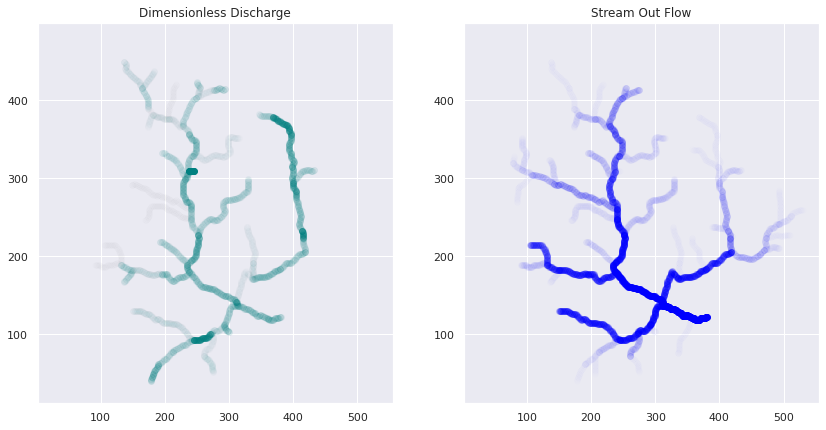

In [102]:
f, (ax1, ax2) = plt.subplots(1, 2)


for segment in segments: 
    cols =  list(mapDf.loc[mapDf['segment'] == segment]['col'])
    rows =  list(mapDf.loc[mapDf['segment'] == segment]['row'])
    ax1.scatter(cols,rows, color = 'teal', alpha=dimensionlessDischargeSum[segment])
    ax1.set_title('Dimensionless Discharge')
    ax2.scatter(cols,rows, color = 'Blue', alpha=outFlowSum[segment])
    ax2.set_title('Stream Out Flow')

f.set_figheight(7)
f.set_figwidth(14)
plt.show()
        
